# Data loading and exploring

In [1]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import seaborn as sns
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model
import tensorflow as ts 
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.utils import plot_model
from keras.optimizers import Adam

# from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [2]:
train_dir = "C:/Users/San Desh/Downloads/Cancer-detection-classification-CNN-deep-learning-main/Cancer-detection-classification-CNN-deep-learning-main/dataset/train"
skin = os.listdir(train_dir)

In [3]:
skin

['benign', 'malignant']

# Train Data

In [4]:
# Number of images for each disease
nums_train = {}
nums_val = {}
for s in skin:
    nums_train[s] = len(os.listdir(train_dir + '/' + s))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


,no. of images
benign,5000
malignant,4605


<Axes: title={'center': 'data distribution '}, xlabel='Type of skin cancer', ylabel='Number of image'>

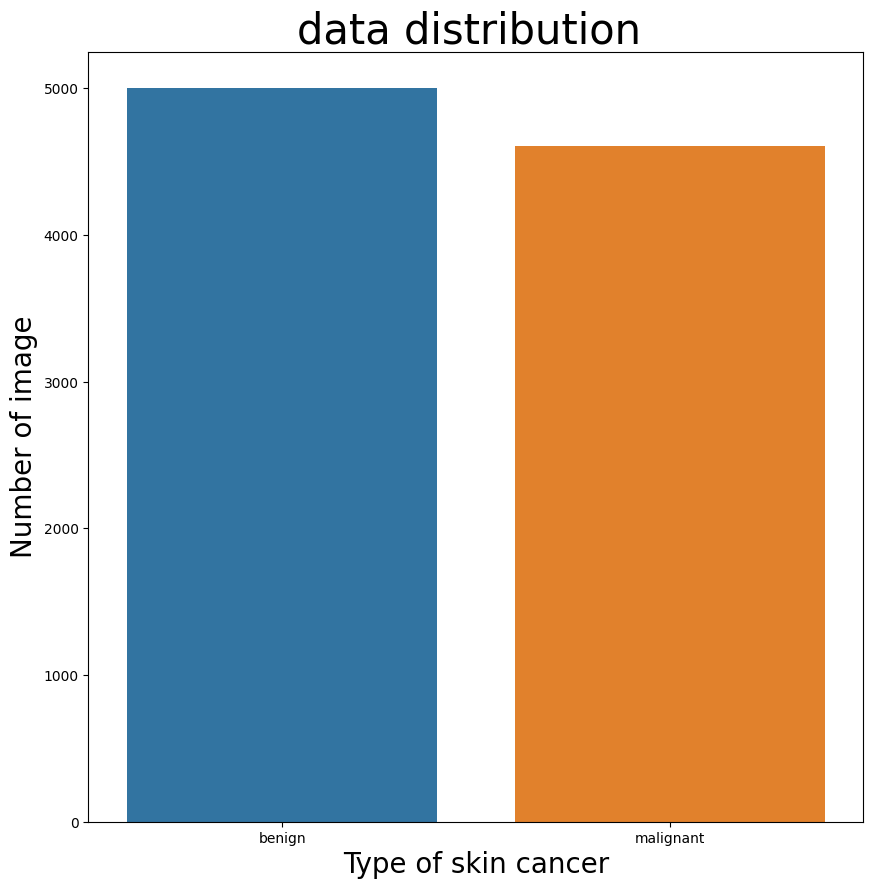

In [5]:
plt.figure(figsize=(10,10))
plt.title('data distribution ',fontsize=30)
plt.ylabel('Number of image',fontsize=20)
plt.xlabel('Type of skin cancer',fontsize=20)

keys = list(nums_train.keys())
vals = list(nums_train.values())
sns.barplot(x=keys, y=vals)


# Showing some images from each class
 

In [6]:
# Function to show image
train = ImageFolder(train_dir, transform=transforms.ToTensor())
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    return image.permute(1, 2, 0)
plt.show()

## Benign

Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)


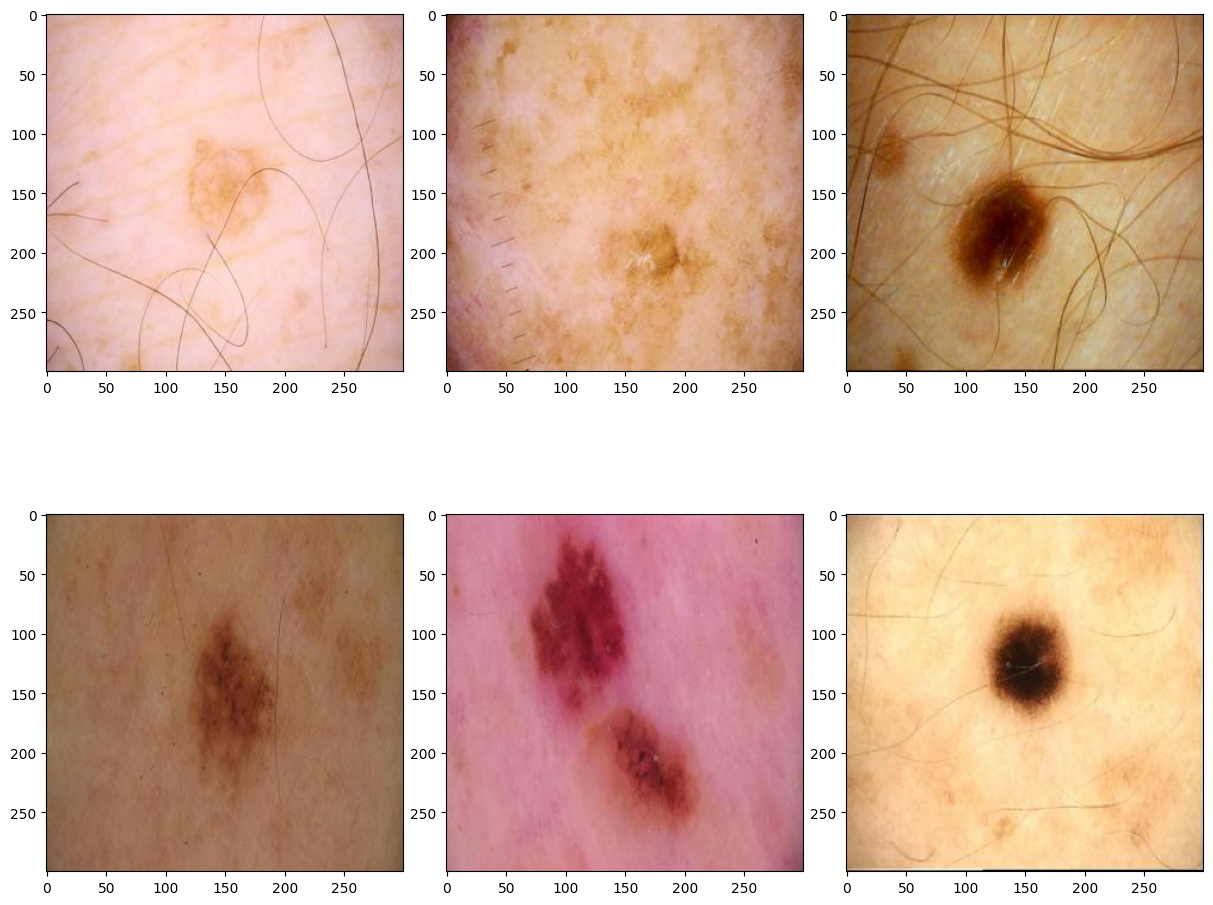

In [7]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[1]))
axs[0,1].imshow(show_image(*train[260]))
axs[1, 0].imshow(show_image(*train[850]))
axs[1,1].imshow(show_image(*train[930]))
axs[0,2].imshow(show_image(*train[1250]))
axs[1,2].imshow(show_image(*train[1380]))

# Malignant

Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)


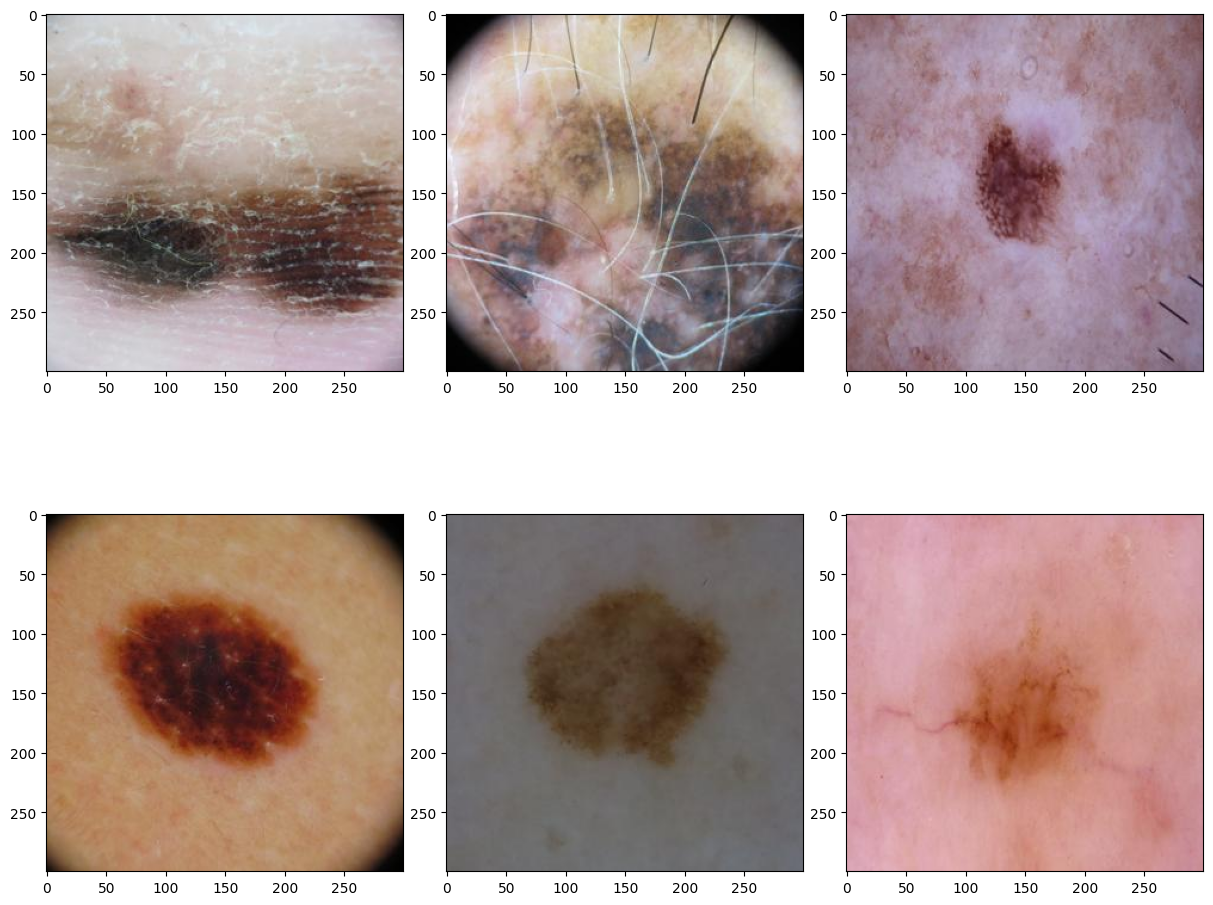

In [8]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[6000]))
axs[0,1].imshow(show_image(*train[7000]))
axs[1, 0].imshow(show_image(*train[8000]))
axs[1,1].imshow(show_image(*train[9000]))
axs[0,2].imshow(show_image(*train[9500]))
axs[1,2].imshow(show_image(*train[9600]))

# Modeling

In [9]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                         rotation_range = 20 ,
                                                         horizontal_flip = True ,
                                                         validation_split = 0.25
                                                         )
valid_gen =  keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split = 0.25)
train_data = train_gen.flow_from_directory(train_dir, subset='training', target_size=(224,224), batch_size=64, color_mode='rgb', 
                                            class_mode='categorical', shuffle=True)

test_data = valid_gen.flow_from_directory(train_dir, subset='validation', target_size=(224,224), batch_size=64, color_mode='rgb', 
                                            class_mode='categorical', shuffle=False)


Found 7204 images belonging to 2 classes.
Found 2401 images belonging to 2 classes.


## Model_1

In [52]:
model_1 = keras.models.Sequential()

model_1.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))

model_1.add(keras.layers.Dropout(0.1))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Conv2D(64, 3, activation='relu'))
model_1.add(keras.layers.Dropout(0.15))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(128, activation='relu'))
model_1.add(keras.layers.Dense(2, activation='softmax'))

model_1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 dropout_2 (Dropout)         (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout_3 (Dropout)         (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [53]:
history = model_1.fit(train_data,
          validation_data=test_data,
          epochs = 10)

Epoch 1/10
113/113 [==============================] - 488s 4s/step - loss: 1.5346 - accuracy: 0.7343 - val_loss: 0.4664 - val_accuracy: 0.8101
Epoch 2/10
113/113 [==============================] - 466s 4s/step - loss: 0.4160 - accuracy: 0.8234 - val_loss: 0.3811 - val_accuracy: 0.8509
Epoch 3/10
113/113 [==============================] - 469s 4s/step - loss: 0.3573 - accuracy: 0.8469 - val_loss: 0.3596 - val_accuracy: 0.8530
Epoch 4/10
113/113 [==============================] - 463s 4s/step - loss: 0.3217 - accuracy: 0.8606 - val_loss: 0.2871 - val_accuracy: 0.8846
Epoch 5/10
113/113 [==============================] - 462s 4s/step - loss: 0.2938 - accuracy: 0.8726 - val_loss: 0.2823 - val_accuracy: 0.8838
Epoch 6/10
113/113 [==============================] - 460s 4s/step - loss: 0.2820 - accuracy: 0.8801 - val_loss: 0.2754 - val_accuracy: 0.8871
Epoch 7/10
113/113 [==============================] - 463s 4s/step - loss: 0.2774 - accuracy: 0.8846 - val_loss: 0.2958 - val_accuracy: 0.8888

In [ ]:
model_1.save('model_1.h5')

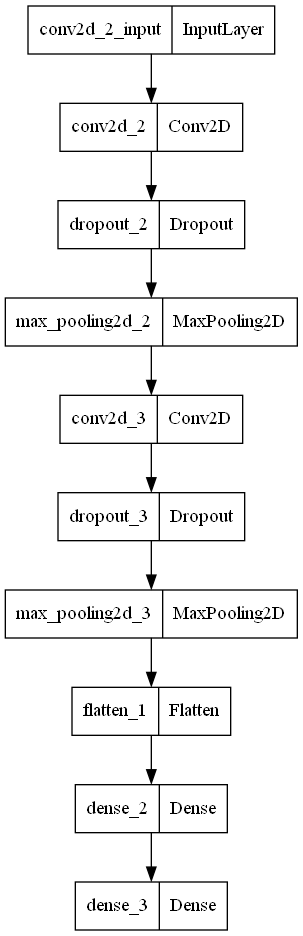

In [54]:
plot_model(
    model_1,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

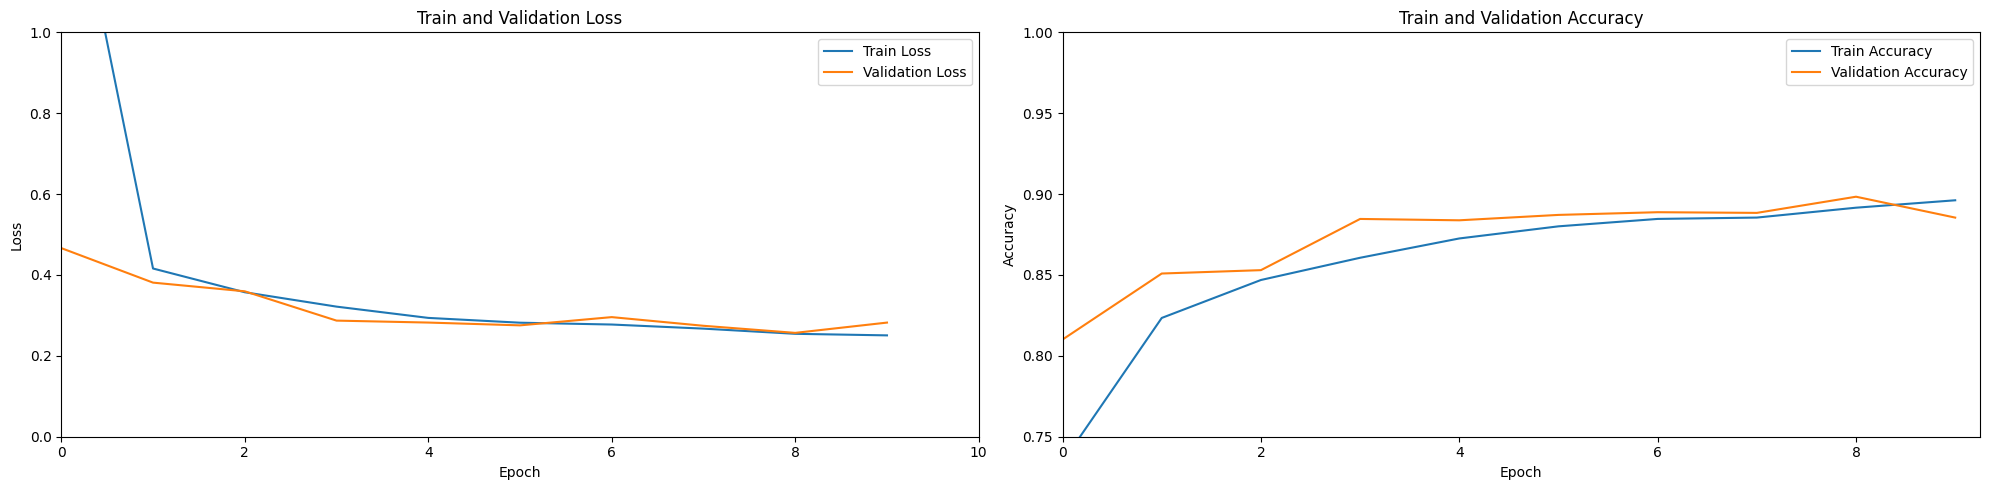

In [55]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [56]:
from sklearn.metrics import classification_report

Y_pred = model_1.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(test_data.classes, y_pred))

38/38 [==============================] - 19s 494ms/step
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1250
           1       0.90      0.86      0.88      1151

    accuracy                           0.89      2401
   macro avg       0.89      0.88      0.88      2401
weighted avg       0.89      0.89      0.89      2401



# Model 2

In [11]:
model_2 = Sequential()

model_2.add(Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))

model_2.add(Dropout(0.1))
model_2.add(MaxPooling2D())

model_2.add(Conv2D(64, 3, activation='relu'))
model_2.add(Dropout(0.15))
model_2.add(MaxPooling2D())

model_2.add(Conv2D(128, 3, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(MaxPooling2D())

model_2.add(Conv2D(256, 3, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(MaxPooling2D())

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

model_2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 dropout (Dropout)           (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

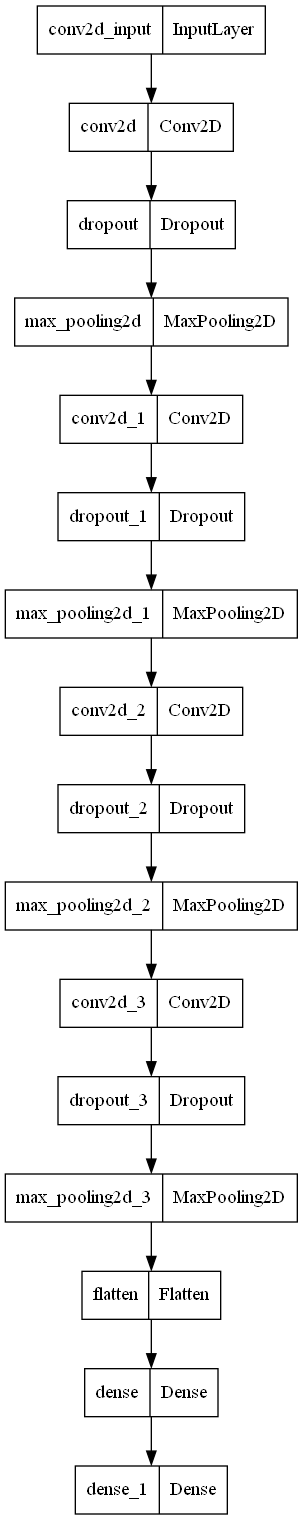

In [12]:
plot_model(
    model_2,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [13]:
history_1 = model_2.fit(train_data,
          validation_data=test_data,
          epochs = 15)

Epoch 1/15
113/113 [==============================] - 642s 6s/step - loss: 0.6335 - accuracy: 0.6675 - val_loss: 0.4911 - val_accuracy: 0.8234
Epoch 2/15
113/113 [==============================] - 623s 6s/step - loss: 0.3778 - accuracy: 0.8268 - val_loss: 0.4284 - val_accuracy: 0.7909
Epoch 3/15
113/113 [==============================] - 611s 5s/step - loss: 0.3197 - accuracy: 0.8629 - val_loss: 0.4207 - val_accuracy: 0.8626
Epoch 4/15
113/113 [==============================] - 608s 5s/step - loss: 0.2988 - accuracy: 0.8741 - val_loss: 0.3828 - val_accuracy: 0.8667
Epoch 5/15
113/113 [==============================] - 606s 5s/step - loss: 0.2937 - accuracy: 0.8719 - val_loss: 0.3526 - val_accuracy: 0.8813
Epoch 6/15
113/113 [==============================] - 602s 5s/step - loss: 0.2735 - accuracy: 0.8830 - val_loss: 0.4144 - val_accuracy: 0.8671
Epoch 7/15
113/113 [==============================] - 605s 5s/step - loss: 0.2669 - accuracy: 0.8871 - val_loss: 0.3544 - val_accuracy: 0.8646

In [79]:
# model_2.save('model_2.h5')
keras.models.save_model(model_2, 'my_model2.hdf5')

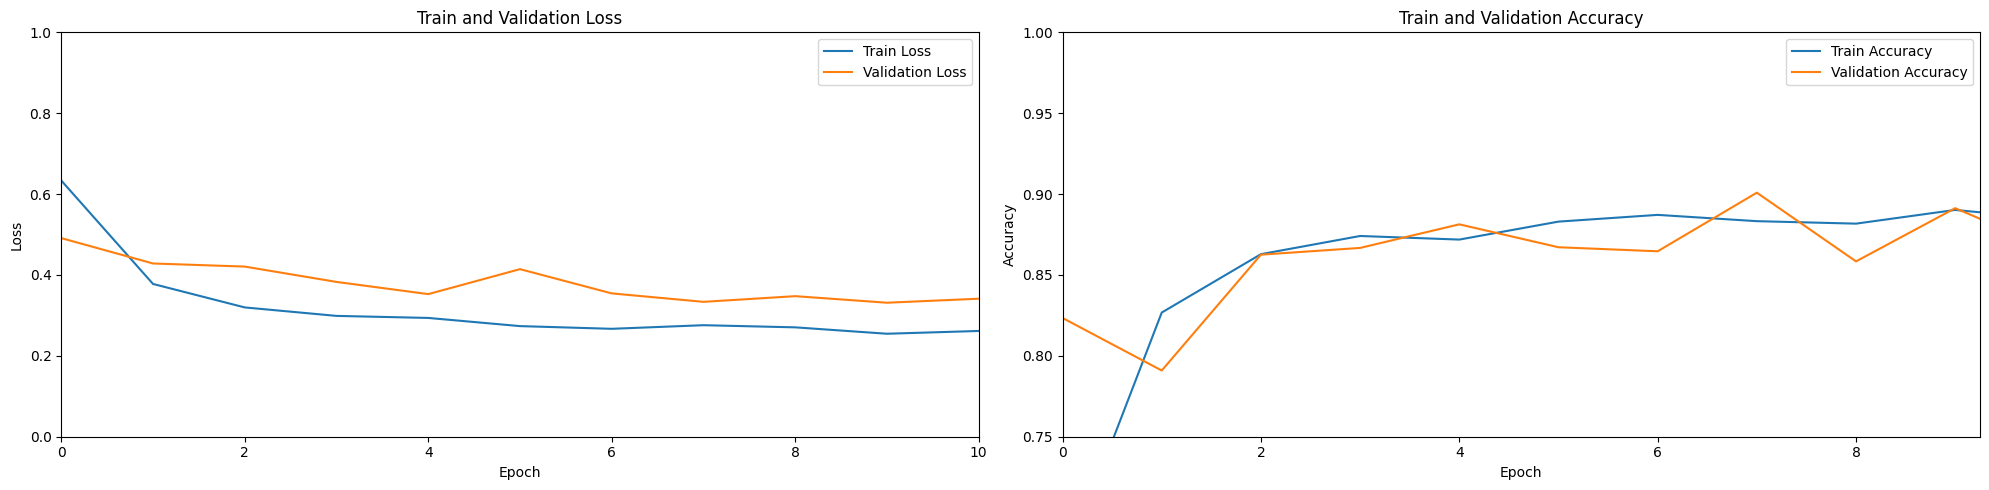

In [17]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history_1.history['loss'],label="Train Loss")
plt.plot(history_1.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history_1.history['accuracy'], label="Train Accuracy")
plt.plot(history_1.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [18]:
from sklearn.metrics import classification_report

Y_pred = model_2.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(test_data.classes, y_pred))

38/38 [==============================] - 22s 567ms/step
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1250
           1       0.90      0.82      0.86      1151

    accuracy                           0.87      2401
   macro avg       0.88      0.87      0.87      2401
weighted avg       0.88      0.87      0.87      2401



## Model_3

In [10]:
model_3 = Sequential()

model_3.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model_3.add(Conv2D(32,(3,3),activation="relu",padding="same"))
model_3.add(MaxPooling2D(3,3))

model_3.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model_3.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model_3.add(MaxPooling2D(3,3))

model_3.add(Flatten())

model_3.add(Dense(128,activation="relu"))
model_3.add(Dropout(0.5))

model_3.add(Dense(2,activation="softmax"))

opt = Adam(learning_rate=0.0001)
model_3.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                    

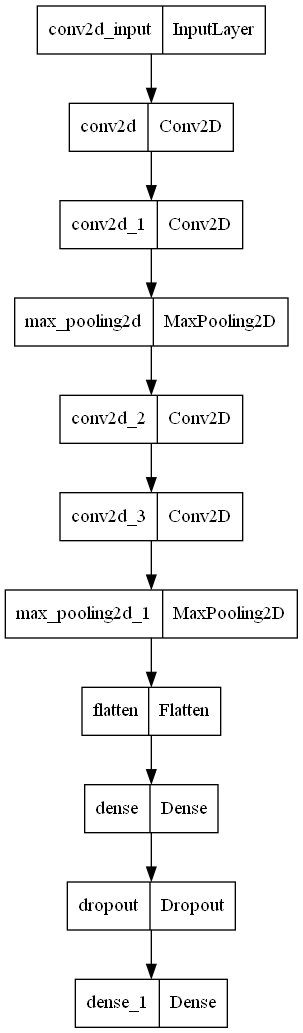

In [11]:
plot_model(
    model_3,
    to_file="model3.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [12]:
history = model_3.fit(train_data,
          validation_data=test_data,
          epochs = 13)

Epoch 1/13
113/113 [==============================] - 688s 6s/step - loss: 0.5207 - accuracy: 0.7326 - val_loss: 0.3648 - val_accuracy: 0.8446
Epoch 2/13
113/113 [==============================] - 656s 6s/step - loss: 0.3781 - accuracy: 0.8348 - val_loss: 0.3303 - val_accuracy: 0.8680
Epoch 3/13
113/113 [==============================] - 657s 6s/step - loss: 0.3282 - accuracy: 0.8637 - val_loss: 0.2975 - val_accuracy: 0.8817
Epoch 4/13
113/113 [==============================] - 656s 6s/step - loss: 0.3080 - accuracy: 0.8723 - val_loss: 0.2764 - val_accuracy: 0.8896
Epoch 5/13
113/113 [==============================] - 657s 6s/step - loss: 0.2983 - accuracy: 0.8772 - val_loss: 0.2674 - val_accuracy: 0.8909
Epoch 6/13
113/113 [==============================] - 658s 6s/step - loss: 0.2798 - accuracy: 0.8898 - val_loss: 0.2621 - val_accuracy: 0.8859
Epoch 7/13
113/113 [==============================] - 658s 6s/step - loss: 0.2715 - accuracy: 0.8890 - val_loss: 0.2532 - val_accuracy: 0.9000

In [13]:
model_3.save('model_3.h5')

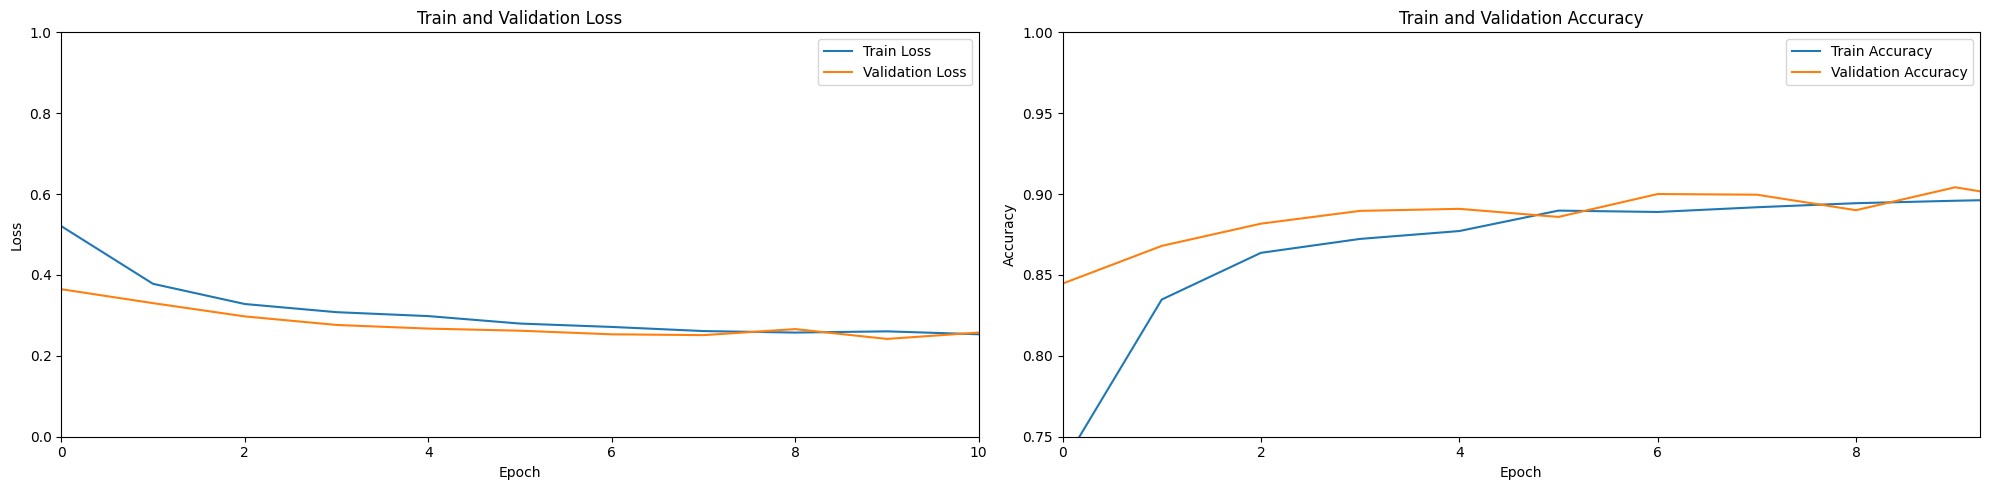

In [14]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [15]:
from sklearn.metrics import classification_report

Y_pred = model_3.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(test_data.classes, y_pred))

38/38 [==============================] - 24s 622ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1250
           1       0.92      0.89      0.91      1151

    accuracy                           0.91      2401
   macro avg       0.91      0.91      0.91      2401
weighted avg       0.91      0.91      0.91      2401



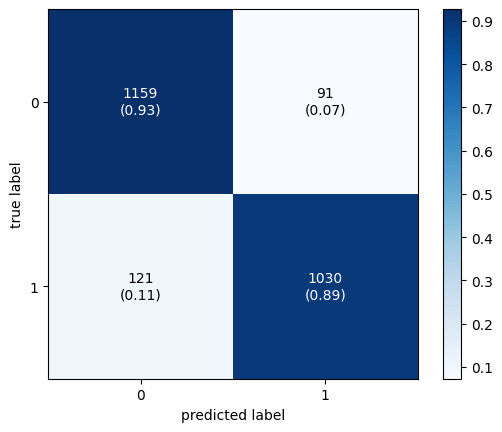

In [16]:
from mlxtend.plotting import plot_confusion_matrix
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(test_data.classes, y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

1/1 [==============================] - 0s 85ms/step
Actual class: malignant
Predictive class: benign


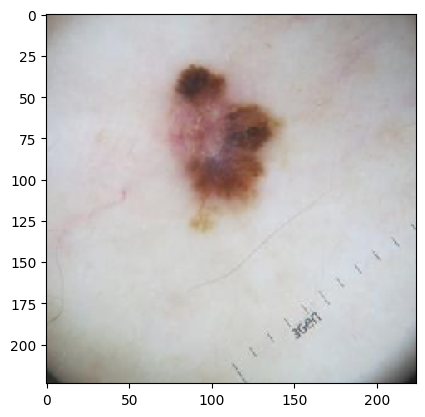

In [30]:
from glob import glob
import random
test_dir = "C:/Users/San Desh/Downloads/Cancer-detection-classification-CNN-deep-learning-main/Cancer-detection-classification-CNN-deep-learning-main/dataset/test"
skin_test = os.listdir(test_dir)
test_image_path = os.path.join(test_dir, skin_test[1], '*')
Test_image = glob(test_image_path)
Test_image = random.choice(Test_image)
Test_image = load_img(Test_image, target_size=(224,224,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image, axis=0)
model_path = 'model_3.h5'
model_skin = load_model(model_path)
pred = model_skin.predict(img)
pred = np.argmax(pred)
pred_class = skin_test[pred]
print("Actual class: " + skin_test[1] + "\n" + "Predictive class: " + pred_class)

1/1 [==============================] - 0s 32ms/step
Actual Class malignant
Predictive Class benign


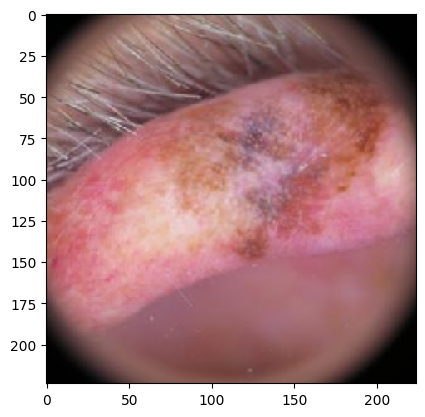

In [78]:
from glob import glob
import random
test_dir = "C:/Users/San Desh/Downloads/Cancer-detection-classification-CNN-deep-learning-main/Cancer-detection-classification-CNN-deep-learning-main/dataset/test"
skin_test = os.listdir(test_dir)
Test_image_path = os.path.join(test_dir, skin_test[1], '*')
Test_image = glob(Test_image_path)
Test_image = random.choice(Test_image)
Test_image = load_img(Test_image, target_size=(224,224,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model_2.predict(img)
pred = np.argmax(pred)
pred_class = skin_test[pred]
print("Actual Class "+ skin_test[1] +'\n'+ "Predictive Class "+pred_class )

In [80]:
%pip install flask

  Using cached Flask-2.3.2-py3-none-any.whl (96 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
Note: you may need to restart the kernel to use updated packages.
